In [1]:
import sys, os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import grainsizing
import plotting
import segmentation_helper
import data_loader

import warnings
warnings.filterwarnings("ignore")

## Measure grain sizes in labels and predictions

Grain sizes are measured for all image files of masks in `PATH` with a specific format (`mask_format`, default = tif). `PATH` can have sub-folders named 'test', 'train'. If `do_subfolders` == True any existing sub-folder will be used.   
- A string (`mask_str`) for filtering file names can be used.
- Alternatives to the default ellipsoid fitting are available.

In [2]:
#set path to cellpose output
PATH = "F:/cellpose/fh"
#optional filters for grain size measuring
filters= {
    'edge':[True,.1],'px_cutoff':[True,12]
    }
#optional properties for regionprops
properties=['label','area','centroid','major_axis_length','minor_axis_length']

In [3]:
#measure grain sizes of ground truth
lbl_grains,lbl_res_props,lbl_IDs = grainsizing.batch_grainsize(PATH,filters=filters,mask_str='_mask',properties=properties,mute=True,return_results=True,do_subfolders=False,do_labels=True,do_predictions=False)
#measure grain sizes of predictions with filter tags
pred_grains,pred_res_props,pred_IDs = grainsizing.batch_grainsize(PATH,filters=filters,mask_str='fh_pred',properties=properties,mute=True,return_results=True,do_subfolders=False,do_labels=False,do_predictions=True)
pred_b_grains,pred_b_res_props,pred_b_IDs = grainsizing.batch_grainsize(PATH,filters=filters,mask_str='fh_boosted_pred',properties=properties,mute=True,return_results=True,do_subfolders=False,do_labels=False,do_predictions=True)

F:/cellpose/fh/pred: 100%|██████████| 7/7 [00:00<00:00,  9.67file/s]


In [4]:
#get image-, label- and pred-paths
imgs,lbls,_ = data_loader.dataset_loader(PATH,label_str='mask',pred_str='fh_pred')
_,_,preds = data_loader.dataset_loader(PATH+'/pred/',pred_str='fh_pred')
_,_,preds_boosted = data_loader.dataset_loader(PATH+'/pred/',pred_str='fh_boosted_pred')
#map to train/test split
preds = segmentation_helper.map_preds_to_imgs(preds,imgs,p_string='_fh_pred')
preds_boosted = segmentation_helper.map_preds_to_imgs(preds_boosted,imgs,p_string='_fh_boosted_pred')
#set plot elements
elements= ['image','mask','ellipse_b','ellipse_a','ellipse']

In [5]:
pred_grains,pred_res_props,pred_IDs= grainsizing.map_grain_res_to_img(imgs,pred_grains,pred_res_props,pred_IDs,p_string='_fh_pred')
pred_b_grains,pred_b_res_props,pred_b_IDs= grainsizing.map_grain_res_to_img(imgs,pred_b_grains,pred_b_res_props,pred_b_IDs,p_string='_fh_boosted_pred')

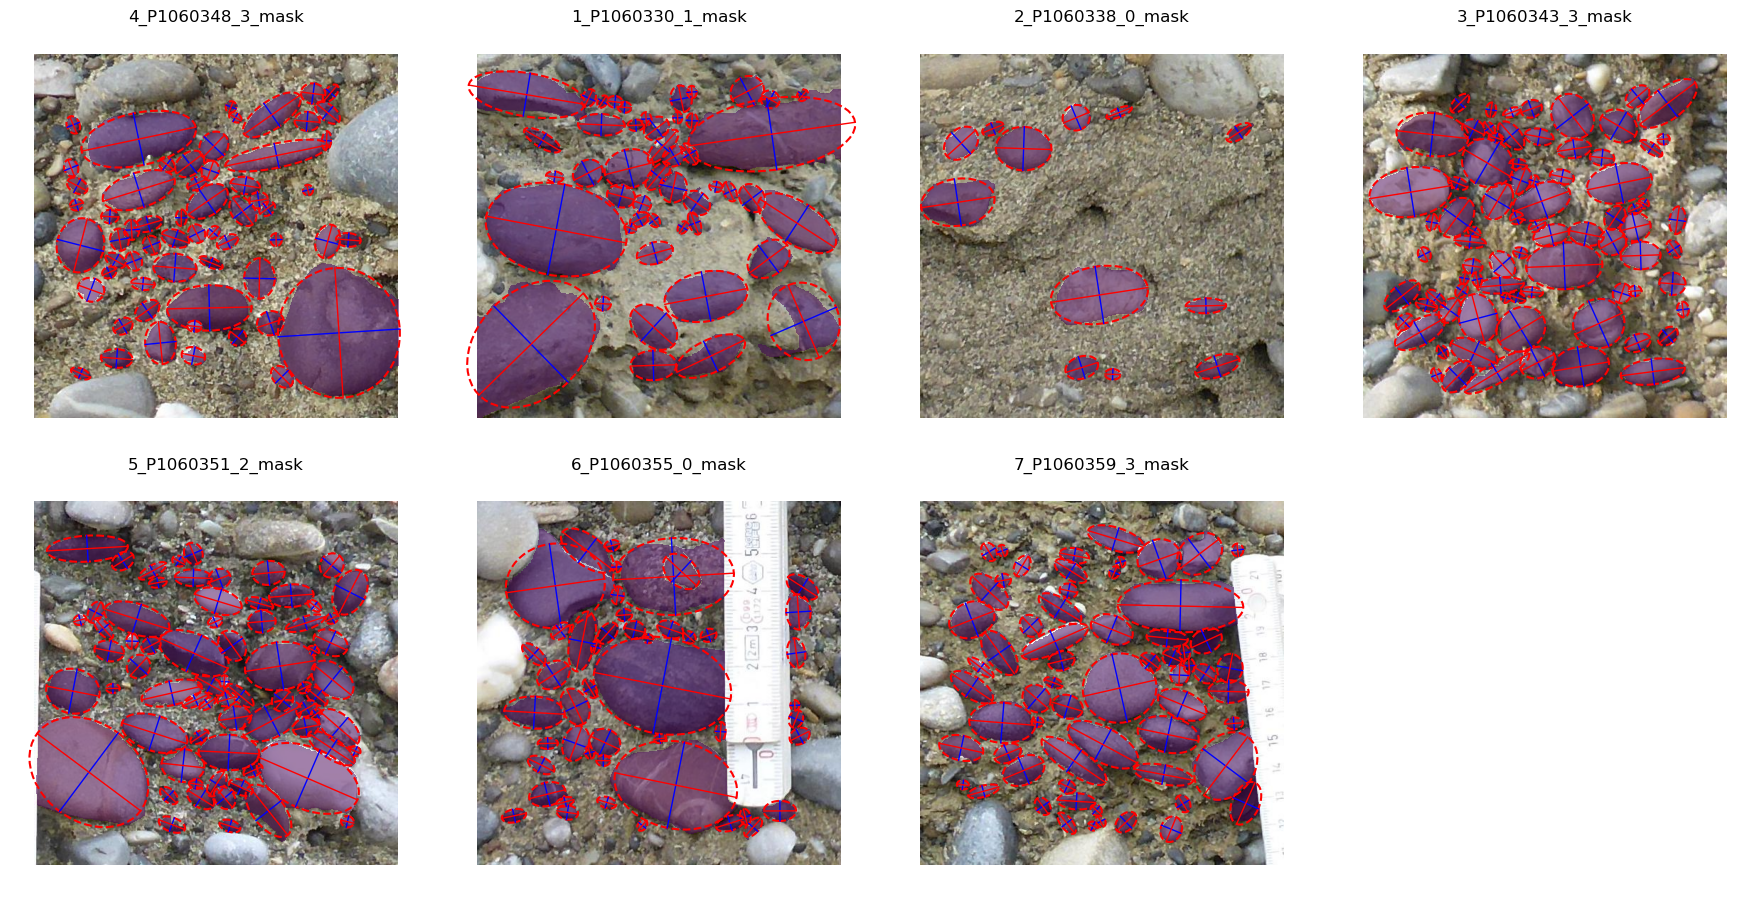

In [8]:
label_grains = plotting.inspect_dataset_grains(imgs,lbls,res_props=lbl_res_props)

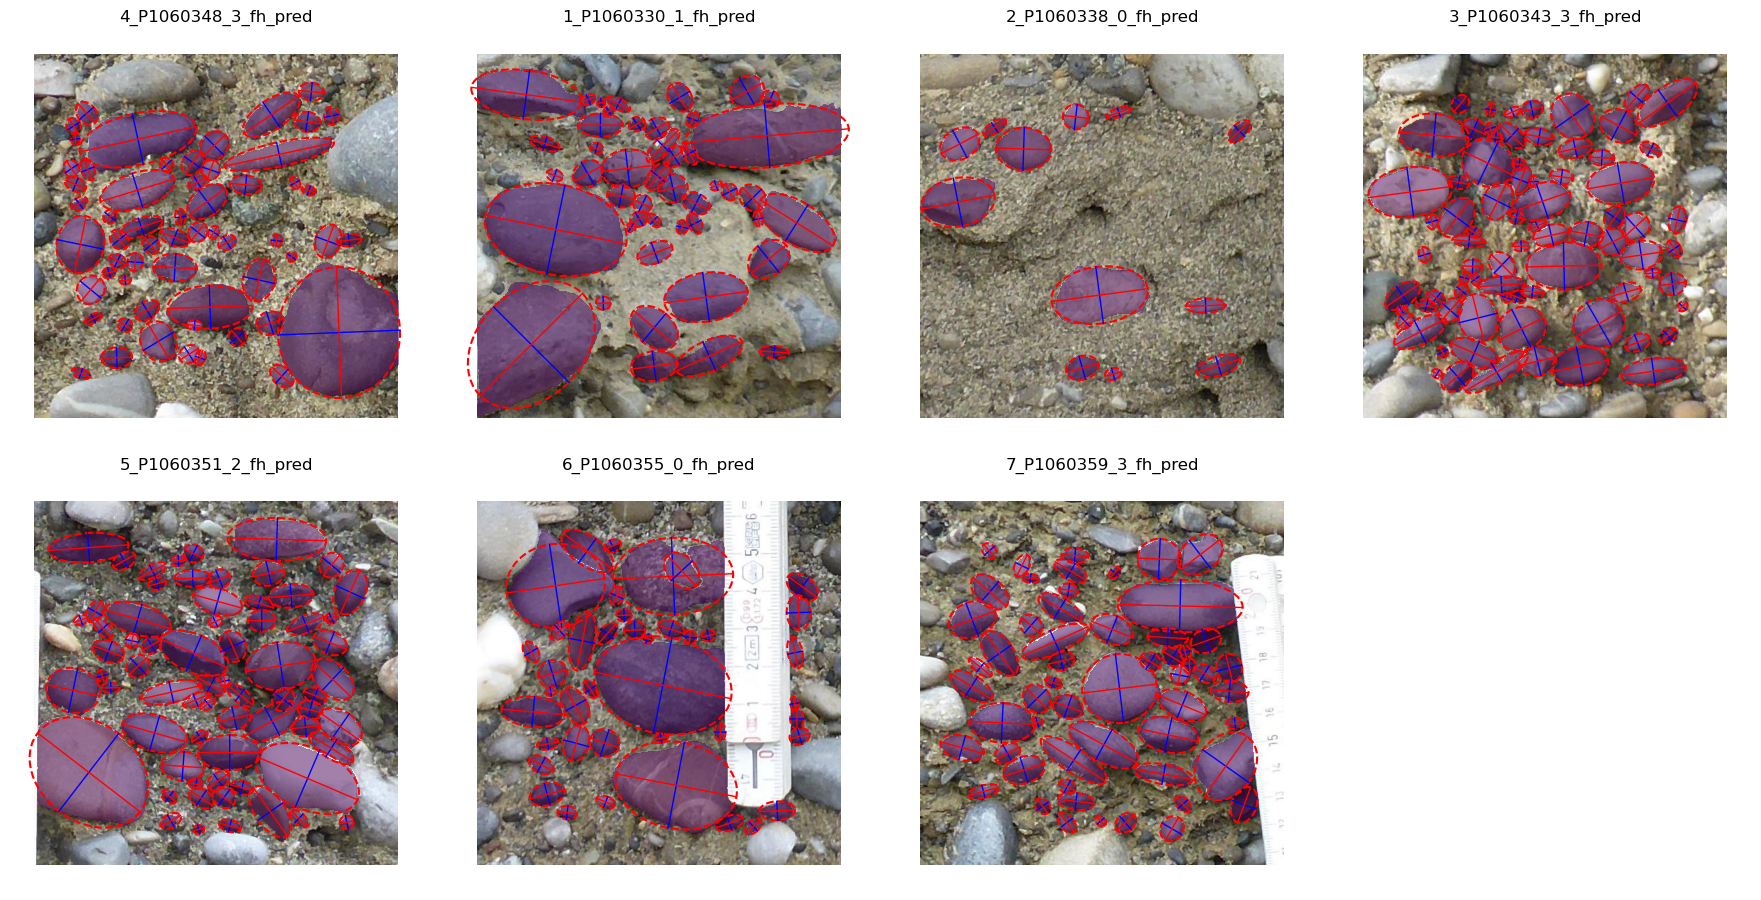

In [7]:
prediction_grains = plotting.inspect_dataset_grains(imgs,preds,res_props=pred_res_props)

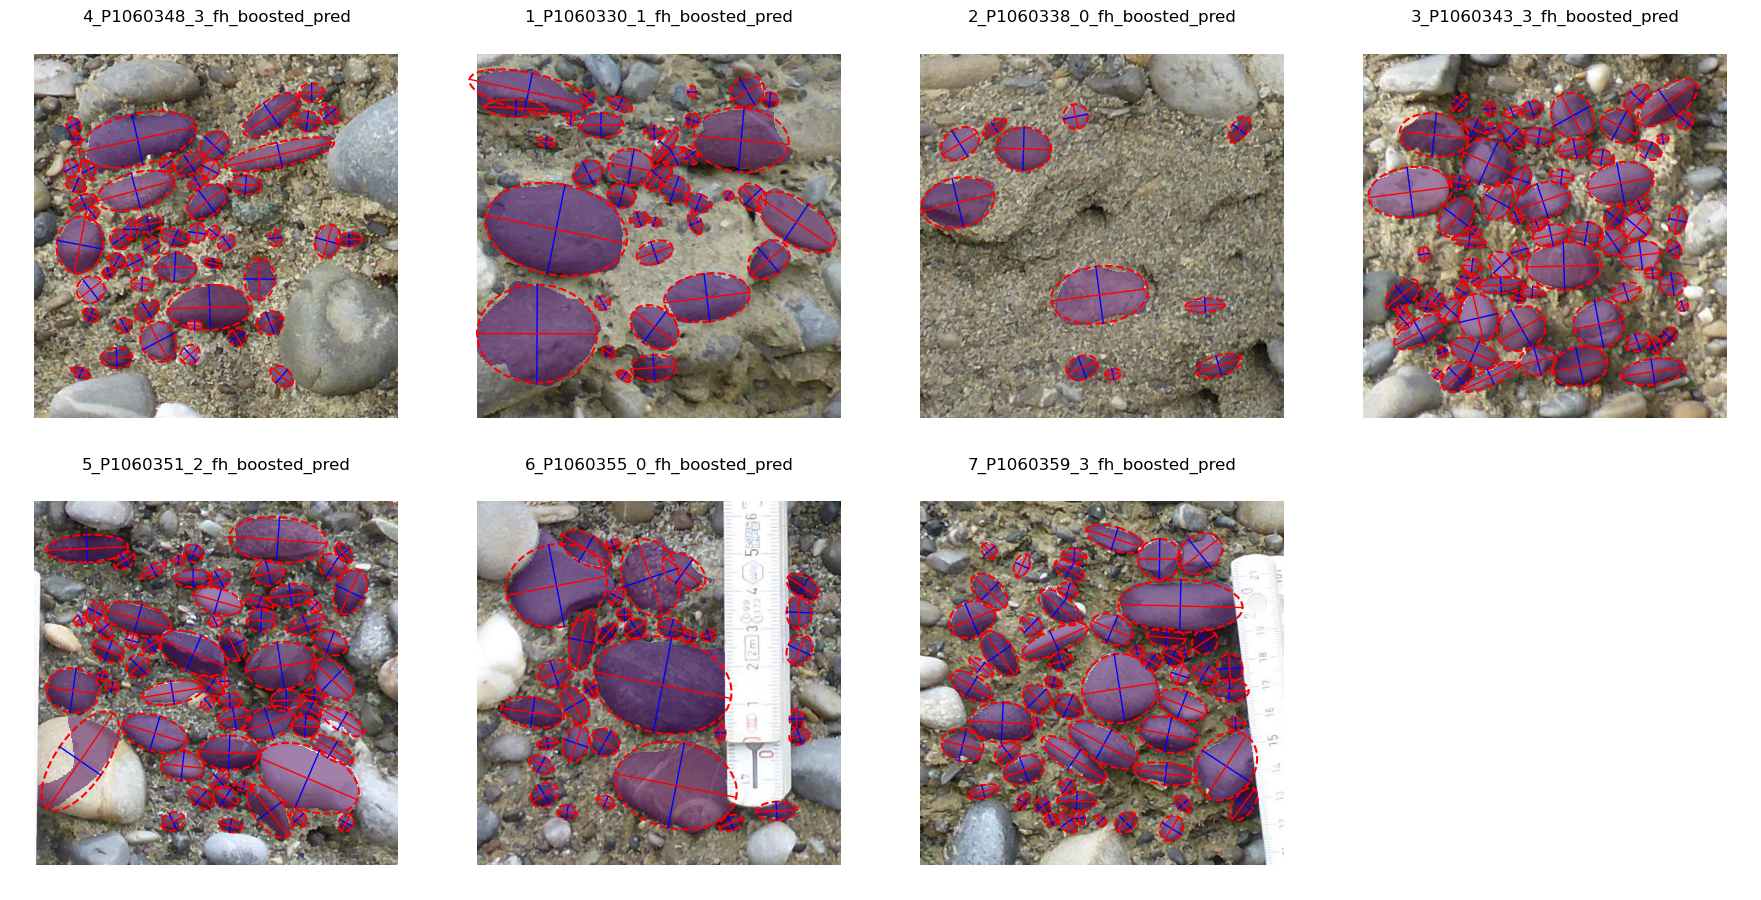

In [13]:
prediction_grains_2 = plotting.inspect_dataset_grains(imgs,preds_boosted,res_props=pred_b_res_props)

## Re-scale grain sizes with image resolution

In [ ]:
camera_parameters = {
    'image_distance_m': [], 
    'focal_length_mm': [],
    'sensorH_mm': [],
    'sensorW_mm': [],
    'pixelsW':[],
    'pixelsH':[],
    }
resolution = 5

In [ ]:
grainsizing.re_scale_dataset(PATH,resolution=[1],gsd_str='_grains');